In [42]:
#Source:https://gatech.instructure.com/courses/62736/files/folder/Advanced%20DNN%20Software%20%26%20Tools
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
import numpy as np
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

np.random.seed(3)

(X_train, Y_train), (X_test_org, Y_test_org) = fashion_mnist.load_data()



In [43]:
X_val = X_train[7000:8000]
Y_val = Y_train[7000:8000]
X_train = X_train[4000:7000]
Y_train = Y_train[4000:7000]
X_test = X_test_org[1000:2000]
Y_test = Y_test_org[1000:2000]

X_train = X_train.reshape(3000, 28,28,1).astype('float32') / 255.0
X_val = X_val.reshape(1000, 28,28,1).astype('float32') / 255.0
X_test = X_test.reshape(1000, 28,28,1).astype('float32') / 255.0


In [44]:
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

In [48]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
hist = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_data=(X_val, Y_val))

print('Mean Accuracy: ',np.mean(hist.history['acc']))
print('Mean Loss: ',np.mean(hist.history['loss']))
print('Mean Val Accuracy: ',np.mean(hist.history['val_acc']))
print('Mean Val Loss: ',np.mean(hist.history['val_loss']))


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1568)            

1000/1000 [==============================] - 0s 234us/sample - loss: 0.3715 - acc: 0.8720
Test loss: 0.3714967897289898
Test accuracy: 0.872


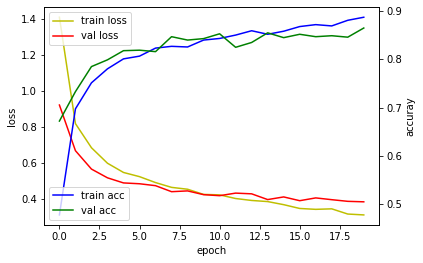

In [49]:
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=10)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

model.save("model2")

In [39]:
(OX_train, OY_train), (OX_test, OY_test) = mnist.load_data()
OX_test = OX_test[:1000]

OX_test_reshape = OX_test.reshape(1000, 28,28,1).astype('float32') / 255.0

predictions = model.predict(OX_test_reshape)

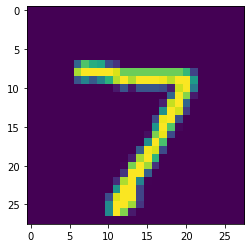

[8.9714512e-02 9.7600417e-04 3.7900624e-01 3.7661913e-01 8.9528289e-04
 5.3658698e-02 9.5288523e-02 9.2705974e-05 2.1557489e-03 1.5932092e-03]


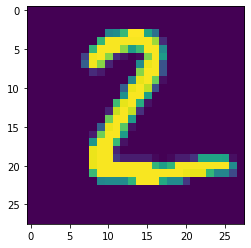

[1.86942494e-03 8.30164063e-04 6.98093232e-03 7.38498867e-01
 1.36619300e-01 5.81722765e-04 1.07848376e-01 4.89075464e-05
 2.57942150e-03 4.14272537e-03]


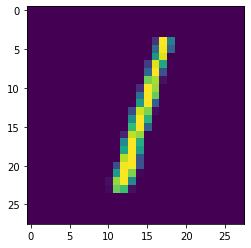

[1.6691400e-03 1.7638048e-03 2.6523133e-04 9.5643783e-01 2.8974379e-03
 7.5965924e-03 4.4070529e-03 9.7557576e-04 3.0330985e-04 2.3684200e-02]


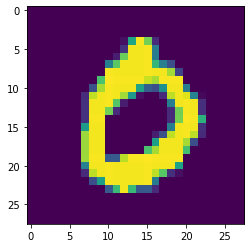

[2.6968198e-03 2.5142988e-04 1.9567378e-03 1.7750812e-03 2.5060687e-02
 9.6800172e-01 2.4902303e-04 3.3083384e-06 5.1457782e-06 8.7027008e-09]


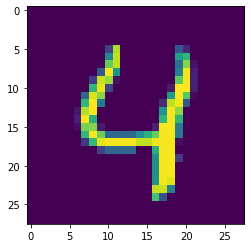

[3.2262459e-02 1.2947247e-02 9.7855866e-02 7.1535248e-04 2.9518565e-02
 2.2515284e-01 5.9606403e-01 2.7258077e-03 2.7577179e-03 1.5438819e-07]


In [40]:
for i in range(5):
    plt.imshow(OX_test[i])
    plt.show()
    print(predictions[i])

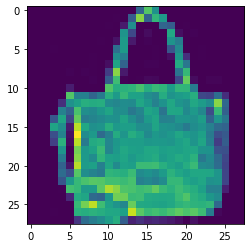

Original:  8
Predicted probabilities:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Predicted Y:  8


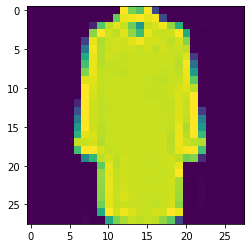

Original:  2
Predicted probabilities:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Predicted Y:  4


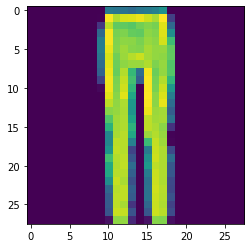

Original:  1
Predicted probabilities:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted Y:  1


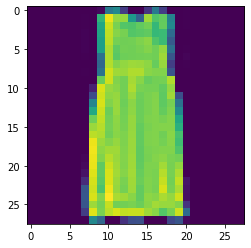

Original:  3
Predicted probabilities:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Predicted Y:  3


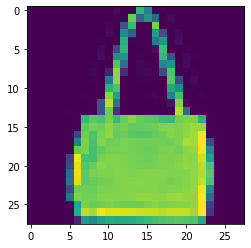

Original:  8
Predicted probabilities:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Predicted Y:  8


In [41]:
X_check = X_test_org[2000:3000]
X_check = X_check.reshape(1000,28,28,1)
Xpredictions = model.predict(X_check)

for i in range(2000,2005):
    plt.imshow(X_test_org[i])
    plt.show()
    print ("Original: ",Y_test_org[i])
    print("Predicted probabilities: ",Xpredictions[i-2000])
    print("Predicted Y: ",np.argmax(Xpredictions[i-2000]))